In [ ]:
# Abrir o arquivo CSV em modo leitura
with open(r'C:\Users\berna\GitHub\B3_IEE\AcoesIndices_2023-12-11.csv', 'r') as arquivo:  
# aqui ém preciso ter o caminho do arquivo de acrdo com cada usuári
    linhas = arquivo.readlines()

# Dividir cada linha com base na estrutura de colunas
dados = []
for linha in linhas:
    colunas = linha.strip().split()  # Dividir a linha onde houver espaços em branco
    dados.append(colunas)

# Agora, 'dados' é uma lista de listas, onde cada lista representa uma linha de colunas

# ler as primeiras 10 linhas
n = 10

# Ler as primeiras n linhas
primeiras_linhas = dados[:n]

# Exibir as primeiras linhas
for linha in primeiras_linhas:
    print(linha)



In [ ]:
# de acordo com resultado foi percebido um erro no arquivo csv. os "indices que quais participa" na verdade trata-se dos tikers das empresas
#já os indices participantes estavam em uma coluna em branco. em vista disso foi essa adequação

import pandas as pd

# Renomear as colunas
colunas = ['Empresa', 'Código', 'Ticker da Empresa', 'Indices Participantes']

#Abrir o arquivo CSV em modo leitura
with open(r'C:\Users\berna\GitHub\B3_IEE\AcoesIndices_2023-12-11.csv', 'r') as arquivo: 
# aqui ém preciso ter o caminho do arquivo de acrdo com cada usuári
    linhas = arquivo.readlines()


# Excluir as primeiras duas linhas (cabeçalho)
linhas = linhas[2:]

# Criar listas para armazenar os dados organizados
empresas = []
codigos = []
tickers = []
indices_participantes = []

# Processar cada linha
for linha in linhas:
    # Dividir a linha onde houver ponto e vírgula
    colunas_linha = linha.strip().split(';')
    
    # Verificar se a linha possui informações suficientes
    if len(colunas_linha) >= 4:
        # Adicionar as informações às listas correspondentes
        empresas.append(colunas_linha[0])
        codigos.append(colunas_linha[1])
        tickers.append(colunas_linha[2])
        indices_participantes.append(colunas_linha[3])

# Criar um DataFrame pandas com os dados organizados
df = pd.DataFrame({
    'Empresa': empresas,
    'Código': codigos,
    'Ticker da Empresa': tickers,
    'Indices Participantes': indices_participantes
})

# Ajustar a exibição para truncar os valores da coluna 'Indices Participantes'
pd.set_option('display.max_colwidth', 50)


# Adicionar ".SA" aos tickers na coluna 'Ticker da Empresa', se ainda não tiver
df_ticker_sa = df['Ticker da Empresa'].apply(lambda x: x + '.SA' if not x.endswith('.SA') else x)

# Remover repetições de ".SA" nos tickers
df_ticker_sa = df['Ticker da Empresa'].apply(lambda x: x.replace('.SA', '') + '.SA')

# Exibir as primeiras linhas do DataFrame após a modificação
df_ticker_sa = pd.DataFrame(df_ticker_sa)

# Criar uma nova coluna 'Ticker da Empresa SA'
df['Ticker da Empresa SA'] = df_ticker_sa['Ticker da Empresa']

# Exibir as primeiras linhas do DataFrame após a modificação
pd.DataFrame(df)



### Agora vamos trabalhar com os dados financeiros destas empresas para saber como anda o setor de energia da B3

In [ ]:
# Filtrar as linhas que contêm 'IEEX' em 'Indices Participantes'
df_ieex = df[df['Indices Participantes'].str.contains('IEEX')]

# Exibir o DataFrame filtrado
df_ieex


In [66]:
!pip install -q yfinance 
import yfinance as yf
!pip install -q fundamentus
import fundamentus
import pandas as pd

2024-03-04 13:41:35,238 [logging.log_init] INFO: LOGLEVEL=INFO


### Explorando a biblioteca Fundamentus. Analise fundamentalista das empresas de energia listadas na B3

In [67]:
ticker = df_ieex ['Ticker da Empresa']
ticker

#Empresa = df_ieex ['Empresa']
#df_fundamentus_ieex['Empresa'] = Empresa


# Obter dados fundamentalistas para todas as ações
df_fundamentus = fundamentus.get_resultado()

# Exibir o DataFrame com os dados fundamentalistas
#print(df_fundamentus)

df_fundamentus_ieex = df_fundamentus.loc[ticker]  # aqui estão as empresas do setor de energia 


#Index(['cotacao', 'pl', 'pvp', 'psr', 'dy', 'pa', 'pcg', 'pebit', 'pacl',
#       'evebit', 'evebitda', 'mrgebit', 'mrgliq', 'roic', 'roe', 'liqc',
#       'liq2m', 'patrliq', 'divbpatr', 'c5y'],

# Renomear as colunas
df_fundamentus_ieex = df_fundamentus_ieex.rename(columns={
    'cotacao': 'Cotação',
    'pl': 'Preço Ação/Lucro Ação',
    'pvp': 'Preço Ação/Valor Patrimonial Ação',
    'psr': 'Preço Ação/Receita Líquida Ação',
    'dy': 'Dividendo Pago Ação/Preço Ação',
    'pa': 'Preço Ação/Ativo Ação',
    'pcg': 'Preço Ação/Capital de Giro Ação',
    'pebit': 'Preço Ação/EBIT Ação',
    'pacl': 'Preço Ação/Ativos Circulantes Líquidos Ação',
    'evebit': 'Enterprise Value/EBIT',
    'evebitda': 'Enterprise Value/EBITDA',
    'mrgebit': 'Margem EBIT (EBIT/Rec. Líquida)',
    'mrgliq': 'Lucro Líquido/Receita Líquida',
    'roic': 'ROIC (Retorno sobre o Capital Investido)',
    'roe': 'ROE (Retorno sobre Patrimônio Líquido)',
    'liqc': 'Liquidez Corrente',
    'liq2m': 'Liquidez 2 Meses',
    'patrliq': 'Patrimônio Líquido',
    'divbpatr': 'Dívida Bruta/Patrimônio Líquido',
    'c5y': 'Crescimento Receita 5 Anos'
})

 
# Exibir o DataFrame após a renomeação
df_fundamentus_ieex



C:\Users\berna\anaconda3\lib\site-packages\fundamentus\resultado.py:50: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(content.text, decimal=",", thousands='.')[0]


Multiples,Cotação,Preço Ação/Lucro Ação,Preço Ação/Valor Patrimonial Ação,Preço Ação/Receita Líquida Ação,Dividendo Pago Ação/Preço Ação,Preço Ação/Ativo Ação,Preço Ação/Capital de Giro Ação,Preço Ação/EBIT Ação,Preço Ação/Ativos Circulantes Líquidos Ação,Enterprise Value/EBIT,Enterprise Value/EBITDA,Margem EBIT (EBIT/Rec. Líquida),Lucro Líquido/Receita Líquida,ROIC (Retorno sobre o Capital Investido),ROE (Retorno sobre Patrimônio Líquido),Liquidez Corrente,Liquidez 2 Meses,Patrimônio Líquido,Dívida Bruta/Patrimônio Líquido,Crescimento Receita 5 Anos
papel,,,,,,,,,,,,,,,,,,,,
AESB3,11.50,43.87,1.55,2.151,0.0000,0.349,21.19,7.43,-0.63,17.33,9.88,0.2895,0.1112,0.0547,0.0353,1.11,22776700.0,4.469480e+09,2.62,0.6222
ALUP11,29.07,11.90,1.17,2.799,0.0597,0.313,3.49,3.96,-0.74,7.94,7.44,0.7064,0.3794,0.0881,0.0987,1.89,19293500.0,7.541460e+09,1.54,-0.0566
AURE3,13.30,6.56,0.95,2.230,0.2256,0.426,3.57,15.45,-1.40,16.97,10.07,0.1444,0.3401,0.0339,0.1452,1.92,81130500.0,1.396240e+10,0.44,0.2156
CMIG4,10.84,4.51,0.98,0.662,0.1019,0.425,7.45,2.90,-1.34,3.86,3.36,0.2283,0.1466,0.1673,0.2164,1.30,175264000.0,2.442780e+10,0.50,0.1186
COCE5,42.70,6.18,0.78,0.382,0.0072,0.253,-1.93,2.29,-0.57,6.05,4.45,0.1672,0.0619,0.1266,0.1268,0.64,806493.0,4.242320e+09,1.37,0.1587
CPLE6,9.53,14.21,1.22,1.289,0.0351,0.510,6.58,8.30,-1.51,11.10,7.94,0.1552,0.0910,0.0714,0.0861,1.48,210543000.0,2.325310e+10,0.65,0.1021
CPFE3,36.88,7.92,2.34,1.064,0.0782,0.576,-13.86,3.94,-1.14,5.74,4.88,0.2701,0.1398,0.1665,0.2954,0.85,55332300.0,1.817270e+10,1.38,0.1003
ELET3,40.86,29.44,0.83,2.675,0.0054,0.341,3.48,8.98,-0.89,12.72,9.47,0.2978,0.0858,0.0433,0.0283,1.88,264167000.0,1.131180e+11,0.63,0.1938
ENGI11,51.75,12.50,1.75,0.778,0.0290,0.323,-56.27,3.65,-0.60,8.04,6.41,0.2135,0.0825,0.1008,0.1402,0.98,104484000.0,1.204500e+10,2.58,0.1147


In [68]:
print(df_fundamentus_ieex.columns)


Index(['Cotação', 'Preço Ação/Lucro Ação', 'Preço Ação/Valor Patrimonial Ação',
       'Preço Ação/Receita Líquida Ação', 'Dividendo Pago Ação/Preço Ação',
       'Preço Ação/Ativo Ação', 'Preço Ação/Capital de Giro Ação',
       'Preço Ação/EBIT Ação', 'Preço Ação/Ativos Circulantes Líquidos Ação',
       'Enterprise Value/EBIT', 'Enterprise Value/EBITDA',
       'Margem EBIT (EBIT/Rec. Líquida)', 'Lucro Líquido/Receita Líquida',
       'ROIC (Retorno sobre o Capital Investido)',
       'ROE (Retorno sobre Patrimônio Líquido)', 'Liquidez Corrente',
       'Liquidez 2 Meses', 'Patrimônio Líquido',
       'Dívida Bruta/Patrimônio Líquido', 'Crescimento Receita 5 Anos'],
      dtype='object', name='Multiples')


In [69]:
# Definir as categorias
categorias_lucro = ['Cotação', 'Preço Ação/Lucro Ação', 'Dividendo Pago Ação/Preço Ação', 'Preço Ação/EBIT Ação', 'Margem EBIT (EBIT/Rec. Líquida)', 'ROIC (Retorno sobre o Capital Investido)', 'ROE (Retorno sobre Patrimônio Líquido)']
categorias_endividamento = ['Dívida Bruta/Patrimônio Líquido']
categorias_liquidez = ['Liquidez Corrente', 'Liquidez 2 Meses']
categorias_avaliacao_receita = ['Preço Ação/Receita Líquida Ação']
categorias_patrimonio = ['Preço Ação/Valor Patrimonial Ação', 'Preço Ação/Ativo Ação', 'Preço Ação/Capital de Giro Ação', 'Preço Ação/Ativos Circulantes Líquidos Ação', 'Patrimônio Líquido']

# Dividir o DataFrame em subconjuntos
df_lucro = df_fundamentus_ieex[categorias_lucro]
df_endividamento = df_fundamentus_ieex[categorias_endividamento]
df_liquidez = df_fundamentus_ieex[categorias_liquidez]
df_avaliacao_receita = df_fundamentus_ieex[categorias_avaliacao_receita]
df_patrimonio = df_fundamentus_ieex[categorias_patrimonio]

#df_lucro
#df_endividamento
#df_liquidez
#df_avaliacao_receita
#df_patrimonio

In [80]:
Empresa = df_ieex ['Empresa']


In [71]:
# Adicionando a coluna "Empresa" ao DataFrame df_lucro
empresas = ['AES BRASIL', 'ALUPAR', 'AUREN', 'CEMIG', 'COELCE', 'COPEL', 'CPFL ENERGIA', 'ELETROBRAS', 'ENERGISA', 'ENEVA', 'ENGIE BRASIL', 'EQUATORIAL', 'NEOENERGIA', 'SERENA', 'TAESA', 'TRAN PAULIST']
df_lucro['Empresa'] = empresas

#Convertendo para porcentagens com uma casa decimal no DataFrame existente

df_lucro['Dividendo Pago Ação/Preço Ação'] = (df_lucro['Dividendo Pago Ação/Preço Ação'] * 100).round(1)
df_lucro['Margem EBIT (EBIT/Rec. Líquida)'] = (df_lucro['Margem EBIT (EBIT/Rec. Líquida)'] * 100).round(1)
df_lucro['ROIC (Retorno sobre o Capital Investido)'] = (df_lucro['ROIC (Retorno sobre o Capital Investido)'] * 100).round(1)
df_lucro['ROE (Retorno sobre Patrimônio Líquido)'] = (df_lucro['ROE (Retorno sobre Patrimônio Líquido)'] * 100).round(1)

df_lucro

#Preço Ação/Lucro Ação  - n de anos que levaria para reaver o capital investido

#Dividendo Pago Ação/Preço Ação - Rendimento Gerado para o dono da ação. Calculado em % 

#Preço Ação/EBIT Ação  entender se o preço atual da ação está justificado pelos ganhos operacionais da empresa. 
#Significa que, em termos relativos, os investidores estão dispostos a pagar x vezes o lucro operacional por ação de cada empresa. 

# Margem EBIT (EBIT/Rec. Líquida) um indicador que mede a lucratividade da empresa sem considerar o efeito de juros e impostos
#A Empresa tem uma Margem EBIT de X %, o que significa que X % de sua receita se transforma em lucro operacional antes de despesas financeiras e impostos

# ROIC  é uma forma de medir o quanto uma empresa ganha com o dinheiro que ela investiu em seu próprio negócio. %
#Em outras palavras, é como se a empresa emprestasse dinheiro a si mesma para crescer e depois quisesse saber se isso deu certo.

#ROE Isso significa que a empresa está gerando um retorno de 20% sobre o patrimônio líquido. %
#você deve considerar o lucro líquido relativo ao ano fiscal completo. Isso quer dizer que deve considerar o valor antes do pagamento dos dividendos


C:\Users\berna\AppData\Local\Temp\ipykernel_10024\2407882167.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_lucro['Empresa'] = empresas
C:\Users\berna\AppData\Local\Temp\ipykernel_10024\2407882167.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_lucro['Dividendo Pago Ação/Preço Ação'] = (df_lucro['Dividendo Pago Ação/Preço Ação'] * 100).round(1)
C:\Users\berna\AppData\Local\Temp\ipykernel_10024\2407882167.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Da

Multiples,Cotação,Preço Ação/Lucro Ação,Dividendo Pago Ação/Preço Ação,Preço Ação/EBIT Ação,Margem EBIT (EBIT/Rec. Líquida),ROIC (Retorno sobre o Capital Investido),ROE (Retorno sobre Patrimônio Líquido),Empresa
papel,,,,,,,,
AESB3,11.50,43.87,0.0,7.43,29.0,5.5,3.5,AES BRASIL
ALUP11,29.07,11.90,6.0,3.96,70.6,8.8,9.9,ALUPAR
AURE3,13.30,6.56,22.6,15.45,14.4,3.4,14.5,AUREN
CMIG4,10.84,4.51,10.2,2.90,22.8,16.7,21.6,CEMIG
COCE5,42.70,6.18,0.7,2.29,16.7,12.7,12.7,COELCE
CPLE6,9.53,14.21,3.5,8.30,15.5,7.1,8.6,COPEL
CPFE3,36.88,7.92,7.8,3.94,27.0,16.6,29.5,CPFL ENERGIA
ELET3,40.86,29.44,0.5,8.98,29.8,4.3,2.8,ELETROBRAS
ENGI11,51.75,12.50,2.9,3.65,21.4,10.1,14.0,ENERGISA


In [72]:
# Encontrar os três menores valores de "Preço Ação/Lucro Ação"
menores_preco_lucro = df_lucro.nsmallest(3, 'Preço Ação/Lucro Ação')

# Encontrar os três maiores valores de "Dividendo Pago Ação/Preço Ação"
maiores_dividendo_preco = df_lucro.nlargest(3, 'Dividendo Pago Ação/Preço Ação')

# Encontrar os três maiores valores de "ROIC (Retorno sobre o Capital Investido)"
maiores_roic = df_lucro.nlargest(3, 'ROIC (Retorno sobre o Capital Investido)')

# Encontrar os três maiores valores de "ROE (Retorno sobre Patrimônio Líquido)" e a respectiva Empresa
maiores_roe = df_lucro.nlargest(3, 'ROE (Retorno sobre Patrimônio Líquido)')[['ROE (Retorno sobre Patrimônio Líquido)', 'Empresa']]

# Imprimir as informações interpretativas
print("Três menores valores de 'Preço Ação/Lucro Ação':")
for index, row in menores_preco_lucro.iterrows():
    print(f"{row['Empresa']} levaria aproximadamente {row['Preço Ação/Lucro Ação']:.2f} anos para reaver o capital investido.")

print("\nTrês maiores valores de 'Dividendo Pago Ação/Preço Ação':")
for index, row in maiores_dividendo_preco.iterrows():
    print(f"A empresa {row['Empresa']} está pagando aproximadamente {row['Dividendo Pago Ação/Preço Ação']:.2f}% de rendimento gerado para o dono da ação.")

print("\nTrês maiores valores de 'ROIC (Retorno sobre o Capital Investido)':")
for index, row in maiores_roic.iterrows():
    print(f"A empresa {row['Empresa']} ganha aproximadamente {row['ROIC (Retorno sobre o Capital Investido)']:.2f}% com o dinheiro investido em seu próprio negócio.")

print("\nTrês maiores valores de 'ROE (Retorno sobre Patrimônio Líquido)':")
for index, row in maiores_roe.iterrows():
    print(f"A empresa {row['Empresa']} está gerando um retorno de aproximadamente {row['ROE (Retorno sobre Patrimônio Líquido)']:.2f}% sobre o patrimônio líquido.")


Três menores valores de 'Preço Ação/Lucro Ação':
CEMIG levaria aproximadamente 4.51 anos para reaver o capital investido.
NEOENERGIA levaria aproximadamente 5.54 anos para reaver o capital investido.
COELCE levaria aproximadamente 6.18 anos para reaver o capital investido.

Três maiores valores de 'Dividendo Pago Ação/Preço Ação':
A empresa AUREN está pagando aproximadamente 22.60% de rendimento gerado para o dono da ação.
A empresa CEMIG está pagando aproximadamente 10.20% de rendimento gerado para o dono da ação.
A empresa TAESA está pagando aproximadamente 8.10% de rendimento gerado para o dono da ação.

Três maiores valores de 'ROIC (Retorno sobre o Capital Investido)':
A empresa CEMIG ganha aproximadamente 16.70% com o dinheiro investido em seu próprio negócio.
A empresa CPFL ENERGIA ganha aproximadamente 16.60% com o dinheiro investido em seu próprio negócio.
A empresa ENGIE BRASIL ganha aproximadamente 15.50% com o dinheiro investido em seu próprio negócio.

Três maiores valores

# dar pedir input e pedir das empresas usuário escolher para realizar os outras analises. 

In [ ]:
# Solicitar ao usuário para escolher uma empresa
empresa_escolhida = input("Digite o símbolo da empresa (por exemplo, 'CMIG4.SA'): ")


In [73]:
CEMIG = yf.Ticker('empresa_escolhida')
# Mostrar demonstrativos financeiros
CEMIG.financials

,2022-12-31,2021-12-31,2020-12-31
Tax Effect Of Unusual Items,1701000.0,94362800.0,27087608.524073
Tax Rate For Calcs,0.0063,0.2012,0.246251
Normalized EBITDA,7502000000.0,7293000000.0,6087000000.0
Total Unusual Items,270000000.0,469000000.0,110000000.0
Total Unusual Items Excluding Goodwill,270000000.0,469000000.0,110000000.0
Net Income From Continuing Operation Net Minority Interest,4092000000.0,3751000000.0,2864000000.0
Reconciled Depreciation,1182000000.0,1049000000.0,989000000.0
Reconciled Cost Of Revenue,26541000000.0,25976000000.0,19845000000.0
EBITDA,7772000000.0,7762000000.0,6197000000.0
EBIT,6590000000.0,6713000000.0,5208000000.0


In [74]:
!pip -q install yfinance
import yfinance as yf
import matplotlib.pyplot as plt
import pandas_datareader as pdr

### De acordo com analise trimestral da CMIG, agora vamos para OHLC para certificamos se a empresa possui uma boa qualidade durante a ano de 2023

In [75]:
# Defina os tickers para CMIG4.SA e IBOV.SA
ticker_cmig4 = 'CMIG4.SA'
ticker_ibov = '^BVSP'  # Ticker para o Ibovespa

# Defina a data de início e de término
start_date = '2023-01-01'
end_date = '2023-12-31'

# Obtenha os dados usando yfinance para CMIG4
dados_cmig4 = yf.download(ticker_cmig4, start=start_date, end=end_date)

# Obtenha os dados usando yfinance para o IBOV
dados_ibov = yf.download(ticker_ibov, start=start_date, end=end_date)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


### comprar o  Adj Close da empresa  CMIG4 com IBOV

<function matplotlib.pyplot.show(close=None, block=None)>

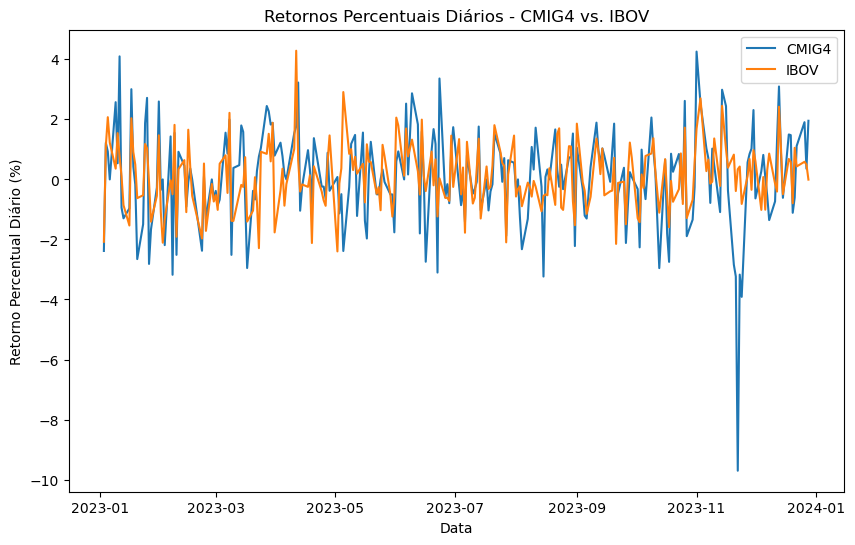

In [76]:
# Calcular retornos percentuais diários
retorno_percentual_cmig4 = cmig4_adj_close.pct_change() * 100
retorno_percentual_ibov = ibov_adj_close.pct_change() * 100

# Traçar os retornos percentuais
plt.figure(figsize=(10, 6))
plt.plot(retorno_percentual_cmig4, label='CMIG4')
plt.plot(retorno_percentual_ibov, label='IBOV')
plt.title('Retornos Percentuais Diários - CMIG4 vs. IBOV')
plt.xlabel('Data')
plt.ylabel('Retorno Percentual Diário (%)')
plt.legend()
plt.show


### ## Estruturas de estratégias dentro do Backtrader 

In [77]:
import investpy
!pip install -q seaborn
import seaborn as sns